<a href="https://colab.research.google.com/github/sightes/RNA-UBO-2023/blob/main/Redes_Neuronales_2023_Identificacion_caracteres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## librerias
import keras
import tensorflow as tf
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import array_to_img
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Flatten,Dense
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

In [16]:
## preparacion datos
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train /255
x_test=x_test /255
n_clases=10
y_train=np_utils.to_categorical(y_train,n_clases)
y_test=np_utils.to_categorical(y_test,n_clases)
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [30]:
## RED: etapa 1
input = keras.layers.Input(shape=(28,28,1), name='input')
sigma = 1  # Parámetro de suavizado
kernel= np.array([[-2, -1, 0],
                  [-1, 1, 1],
                  [0, 1, 2]])
init=tf.constant_initializer(kernel)
model = tf.keras.models.Sequential()

x = tf.keras.layers.Conv2D(1, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', kernel_initializer=init, use_bias = False)(input)
x = MaxPooling2D(pool_size=(2,2))(x)

model = tf.keras.models.Model(inputs=[input], outputs=x, name='Color_Filter')
#print(model.summary())
#keras.utils.plot_model(model, show_shapes=True)

313/313 [==============================] - 1s 3ms/step


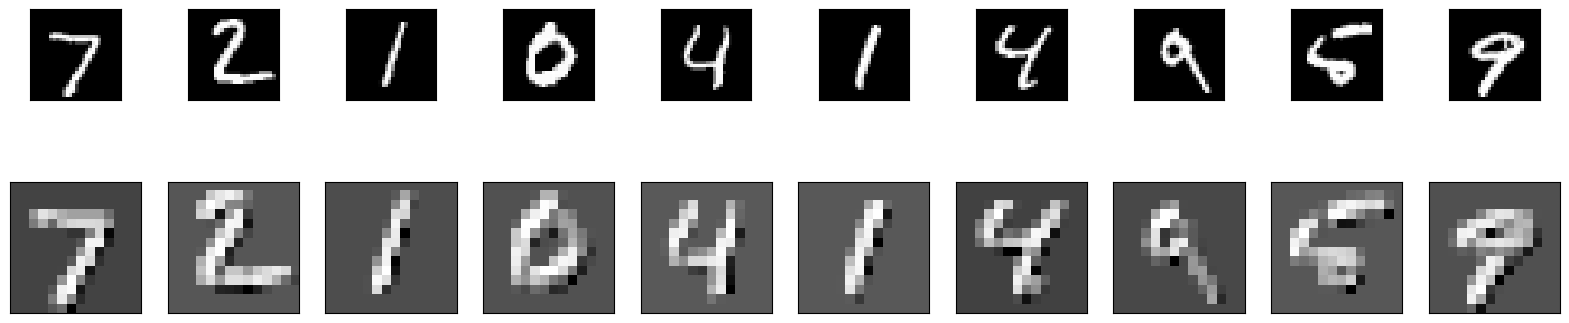

In [31]:
import matplotlib.pyplot as plt
conv_imgs =model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(conv_imgs[i].reshape(14, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()